# Field wraper NPD

The main objective of the wraper is to facilitate extracting data at the field level from NPD using their API

In [14]:
# import libraries 
%load_ext autoreload
%autoreload 2
%matplotlib inline


from npd_wraper import field
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## field Monthly production 

Objective is to extract historical production at field level on a monthly basis, an option to filter by a field level is also available
The result will be a dataframe that could be used for futther processing

### 1- Extract production for a specific field 

lets extract and plot production for "visund" field

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

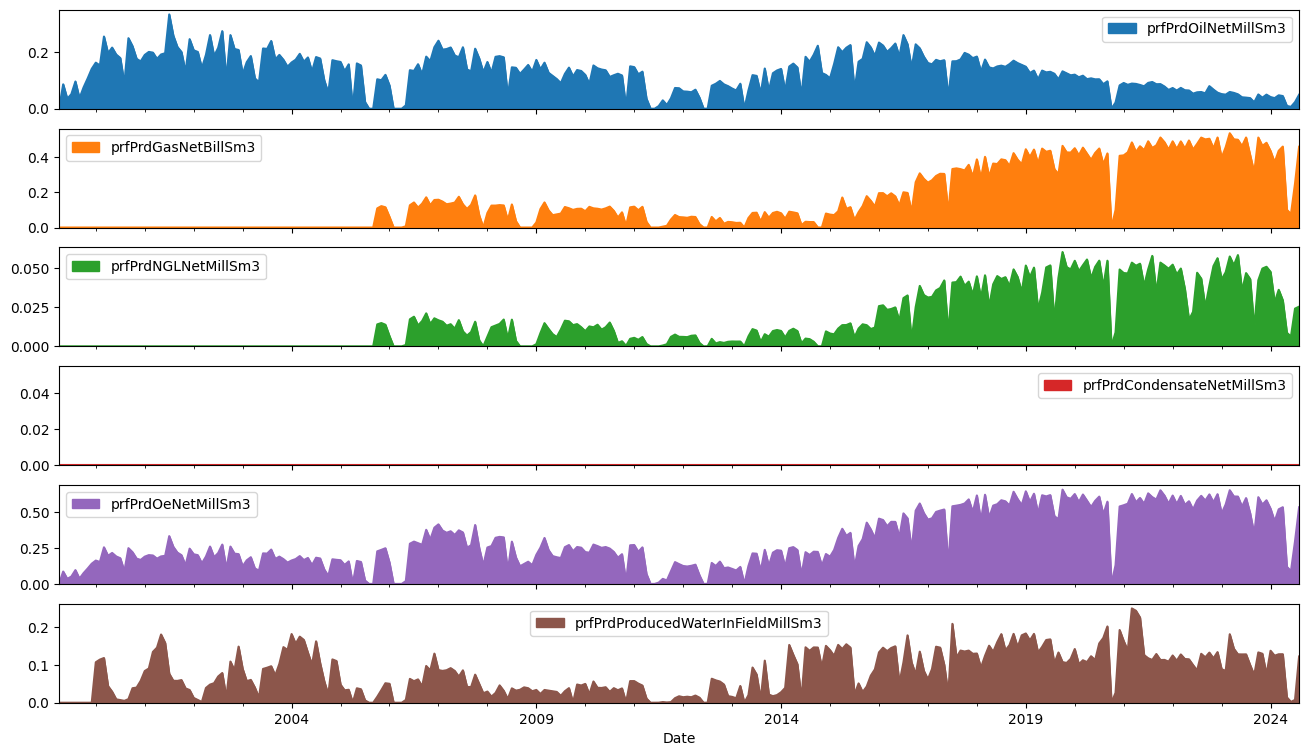

In [15]:
# extract field production for visund as an example
df=field().get_field_production_monthly(field_name="visund")
df.plot(kind="area",subplots=True, figsize=(16,9))

### 2- Check the best field this year:

Let's ranq the best 20 fields roduction this year

<Axes: ylabel='prfInformationCarrier'>

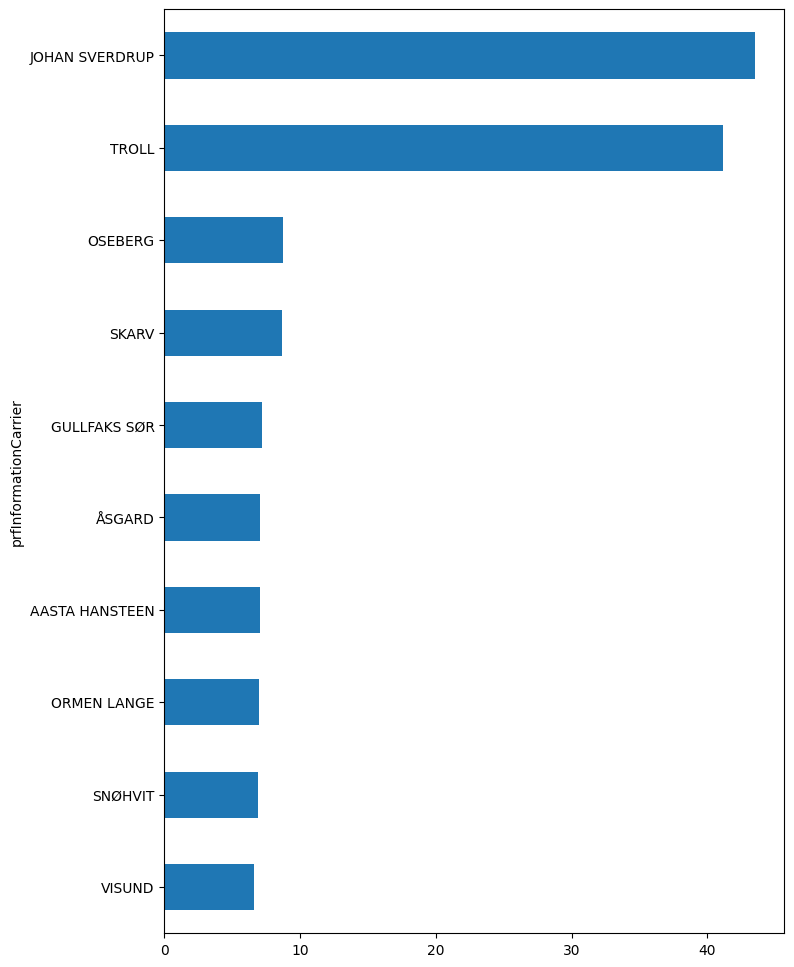

In [28]:
fig=plt.figure(figsize=(8,12))
df= field().get_field_production_yearly()

#deal with some issues on npd database
#df["prfPrdOeNetMillSm3"]=df["prfPrdOeNetMillSm3"].str.strip("(").str.strip(")")
#df["prfPrdOeNetMillSm3"]=df["prfPrdOeNetMillSm3"].astype("float")

#extract the current year production
df=df.loc[2023,]
df.set_index('prfInformationCarrier')["prfPrdOeNetMillSm3"].sort_values(ascending=False)[:10].sort_values(ascending=True).plot(kind="barh")


### 3-Field description

This is very useful to get some insights on each field 
Let s check field description on __johan sverdrup__ !

In [29]:
df=field().get_field_description(field_name="johan sverdrup")

#development attribute
for attrib in df.fldDescriptionHeading.unique():
    print(f"{attrib}: \n")
    print (f"{df[df['fldDescriptionHeading']==attrib].values[0]}\n\n")



Transport: 

['JOHAN SVERDRUP' 'Transport'
 'Stabilised oil is exported from the riser platform through a new oil export pipeline that is connected to existing underground storage caverns at the Mongstad terminal. The gas is exported from the riser platform to the Kårstø terminal through a new pipeline connected to Statpipe.'
 26376286 '28.02.2023' '05.11.2024']


Recovery strategy: 

['JOHAN SVERDRUP' 'Recovery strategy'
 'The field is produced by water injection as pressure support, as well as gas lift in the production wells.'
 26376286 '13.12.2023' '05.11.2024']


Development: 

['JOHAN SVERDRUP' 'Development'
 'Johan Sverdrup is a field on the Utsira High in the central part of the North Sea, 65 kilometres northeast of the Sleipner fields. The water depth is 115 metres. Johan Sverdrup was discovered in 2010 and the plan for development and operation (PDO) for Phase I was approved in 2015. The development solution for the first development phase is a field centre with four speciali

### 4- Field in place

return field inplace per field, let s investigate field in place in __Oseberg__

array([<Axes: ylabel='80'>], dtype=object)

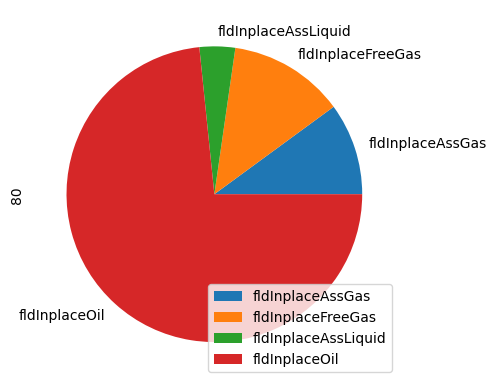

In [30]:
df=field().get_field_inplace_volume(field_name="oseberg")
df[['fldInplaceAssGas','fldInplaceFreeGas','fldInplaceAssLiquid','fldInplaceOil']].T.plot(kind="pie", subplots=True)

To get some key information on each field .... __get_field_overview__ would be quite helpful

In [31]:
df=field().get_field_overview(field_name="oseberg")

In [32]:
df.T

,80
fldName,OSEBERG
cmpLongName,Equinor Energy AS
fldCurrentActivitySatus,Producing
wlbName,30/6-1
wlbCompletionDate,22.09.1979
fldMainArea,North sea
fldOwnerKind,BUSINESS ARRANGEMENT AREA
fldOwnerName,OSEBERG AREA UNIT
fldMainSupplyBase,Mongstad
fldHcType,OIL/GAS


### 5-Field reserves

return a field reserve per field, could get both recoverable and the remaining reserves 
let s get a reserve in grane 

In [33]:
df=field().get_field_reserves(field_name="grane")

In [34]:
df[["fldRemainingOil","fldRemainingGas"]].T

,39
fldRemainingOil,15.75
fldRemainingGas,0.00


### 6- Field investments

In [35]:
df=field().get_field_investments(field_name="grane")

<Axes: xlabel='prfYear'>

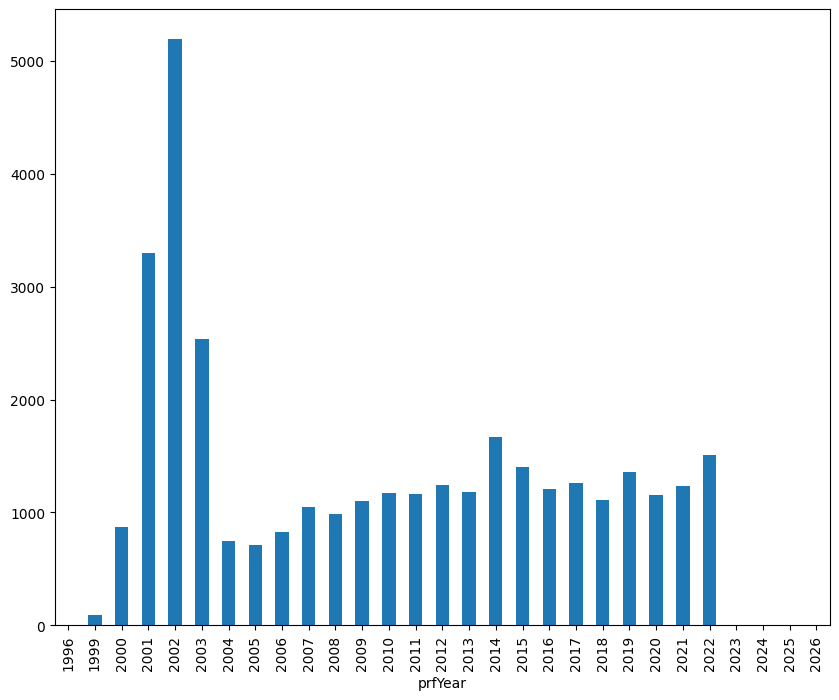

In [36]:
df.set_index("prfYear")['prfInvestmentsMillNOK'].plot(kind="bar", figsize=(10,8))

# Field wraper NPD

The main objective of the wraper is to facilitate extracting data at the field level from NPD using their API

In [37]:
from npd_wraper import field
import matplotlib.pyplot as plt

## field Monthly production 

Objective is to extract historical production at field level on a monthly basis, an option to filter by a field level is also available
The result will be a dataframe that could be used for futther processing

### 1- Extract production for a specific field 

lets extract and plot production for "visund" field

In [38]:
df=field().get_field_description()

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

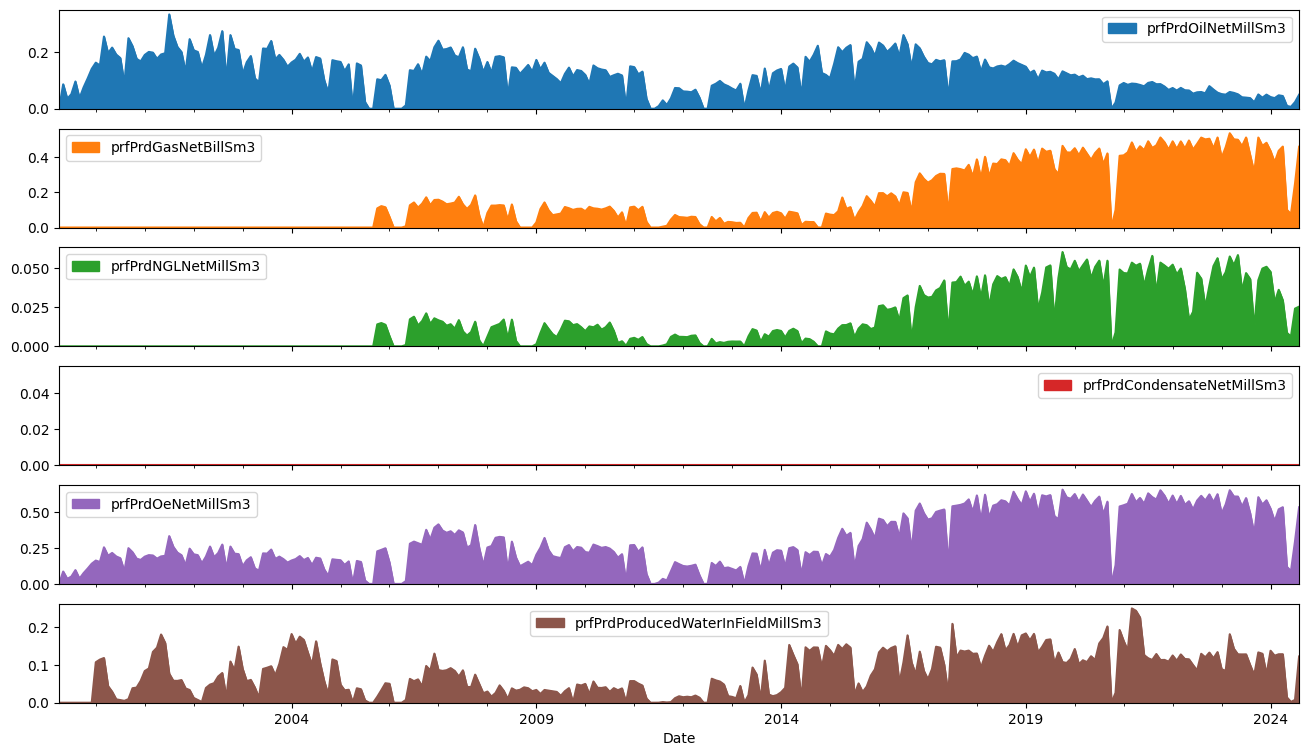

In [39]:
# extract field production for visund as an example
df=field().get_field_production_monthly(field_name="visund")
df.plot(kind="area",subplots=True, figsize=(16,9))

### 2- Check the best field this year:

Let's ranq the best 20 fields roduction this year

<Axes: ylabel='prfInformationCarrier'>

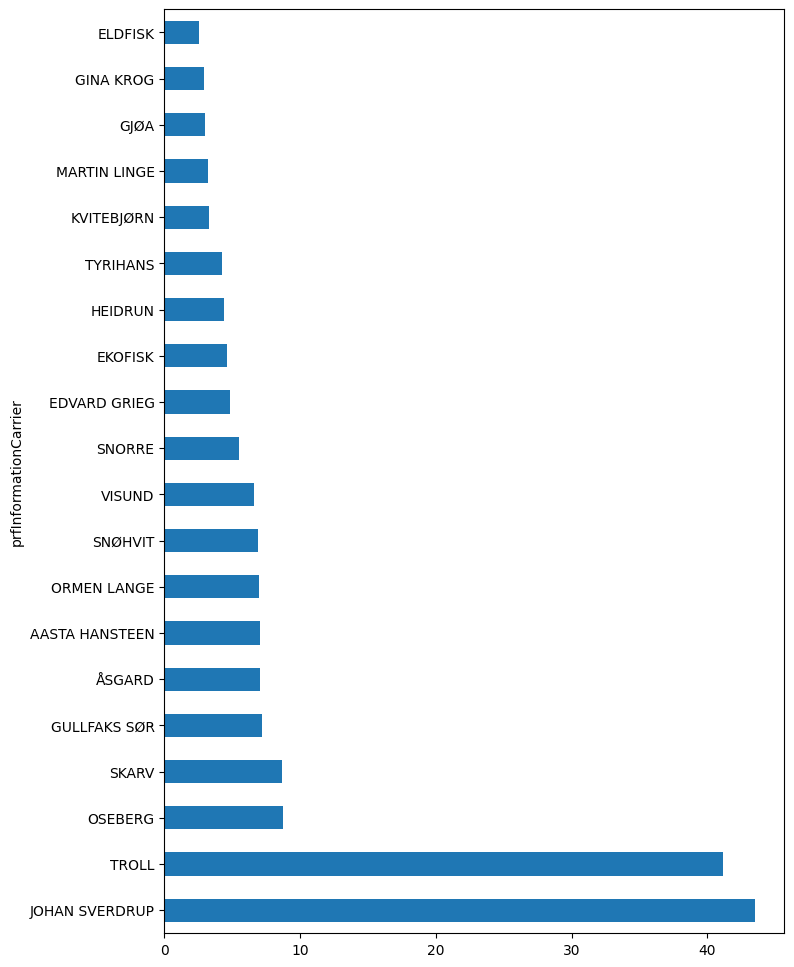

In [42]:
fig=plt.figure(figsize=(8,12))
df= field().get_field_production_yearly()



#extract the current year production
df=df.loc[2023,]
df.set_index('prfInformationCarrier')["prfPrdOeNetMillSm3"].sort_values(ascending=False)[:20].plot(kind="barh")

### 3-Field description

This is very useful to get some insights on each field 
Let s check field description on __johan sverdrup__ !

In [43]:
df=field().get_field_description(field_name="johan sverdrup")

#development attribute
for attrib in df.fldDescriptionHeading.unique():
    print(f"{attrib}: \n")
    print (f"{df[df['fldDescriptionHeading']==attrib].values[0]}\n\n")



Transport: 

['JOHAN SVERDRUP' 'Transport'
 'Stabilised oil is exported from the riser platform through a new oil export pipeline that is connected to existing underground storage caverns at the Mongstad terminal. The gas is exported from the riser platform to the Kårstø terminal through a new pipeline connected to Statpipe.'
 26376286 '28.02.2023' '05.11.2024']


Recovery strategy: 

['JOHAN SVERDRUP' 'Recovery strategy'
 'The field is produced by water injection as pressure support, as well as gas lift in the production wells.'
 26376286 '13.12.2023' '05.11.2024']


Development: 

['JOHAN SVERDRUP' 'Development'
 'Johan Sverdrup is a field on the Utsira High in the central part of the North Sea, 65 kilometres northeast of the Sleipner fields. The water depth is 115 metres. Johan Sverdrup was discovered in 2010 and the plan for development and operation (PDO) for Phase I was approved in 2015. The development solution for the first development phase is a field centre with four speciali

### 4- Field in place

return field inplace per field, let s investigate field in place in __Oseberg__

array([<AxesSubplot:ylabel='69'>], dtype=object)

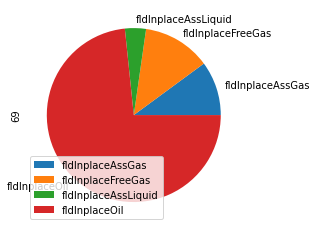

In [60]:
df=field().get_field_inplace_volume(field_name="oseberg")
df[['fldInplaceAssGas','fldInplaceFreeGas','fldInplaceAssLiquid','fldInplaceOil']].T.plot(kind="pie", subplots=True)

To get some key information on each field .... __get_field_overview__ would be quite helpful

In [61]:
df=field().get_field_overview(field_name="oseberg")

In [63]:
df.T

,69
wlbCompletionDate,22.09.1979
wlbName,30/6-1
fldMainArea,North Sea
fldName,OSEBERG
fldMainSupplyBase,Mongstad
fldOwnerKind,BUSINESS ARRANGEMENT AREA
cmpNpdidCompany,32011216
fldFactMapUrl,https://factmaps.npd.no/factmaps/3_0/?run=Fiel...
fldFactPageUrl,https://factpages.npd.no/factpages/default.asp...
fldOwnerName,OSEBERG AREA UNIT


### 5-Field reserves

return a field reserve per field, could get both recoverable and the remaining reserves 
let s get a reserve in grane 

In [65]:
df=field().get_field_reserves(field_name="grane")

In [71]:
df[["fldRemainingOil","fldRemainingGas"]].T

,33
fldRemainingOil,25.83
fldRemainingGas,0.00


### 6- Field investments

In [72]:
df=field().get_field_investments(field_name="grane")

<AxesSubplot:xlabel='prfYear'>

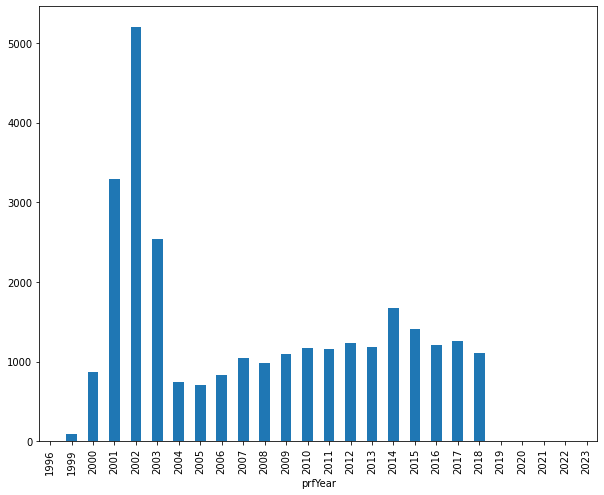

In [75]:
df.set_index("prfYear")['prfInvestmentsMillNOK'].plot(kind="bar", figsize=(10,8))